In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
df=pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6260,0458-HEUZG,Female,0,No,No,13,No,No phone service,DSL,No,...,Yes,Yes,No,No,Two year,No,Mailed check,35.40,450.4,No
3513,4063-EIKNQ,Male,0,Yes,Yes,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,267.35,No
5760,4583-PARNH,Male,1,Yes,No,16,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,91.55,1540.05,No
3733,0191-EQUUH,Female,0,No,Yes,25,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),35.05,844.45,No
3054,6465-GSRCL,Female,0,No,Yes,67,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),106.60,7244.7,No


In [39]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [40]:
# 'customerID' column does not exist, so nothing to drop
df.drop(columns=['customerID'], inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [41]:
#Total Charges is a string, so we need to convert it to float
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [42]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [43]:
#Remove the rows with null values in TotalCharges
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [44]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [46]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


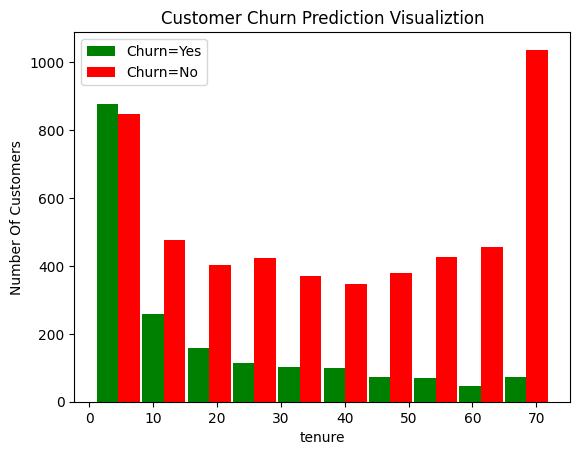

In [47]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

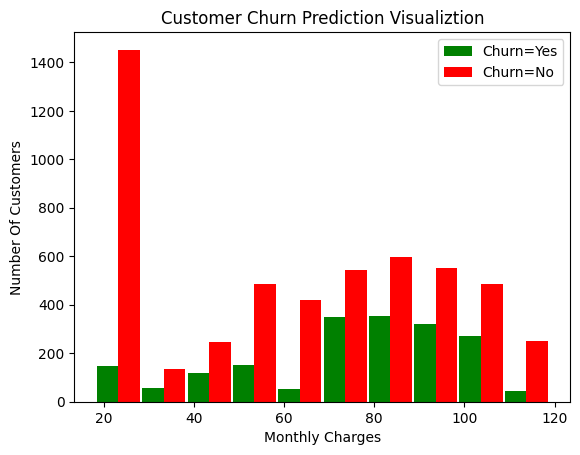

In [48]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [49]:
def print_unique_col_values(df):
    for col in df:
        if df[col].dtypes=='object':
            print(f"{col}:{df[col].unique()}")

In [50]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [51]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [52]:
print_unique_col_values(df1)


gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [53]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [54]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [55]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df1.gender.unique()

array([1, 0])

In [56]:
#One hot encoding for categorical variables
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [57]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
969,1,0,0,0,2,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3340,1,1,0,0,5,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
996,1,0,0,0,34,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1965,0,0,0,0,24,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
7001,0,0,0,0,3,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [58]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [59]:
#Scale the data
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [60]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [61]:
X=df2.drop('Churn',axis='columns')
y=testLabels=df2.Churn.astype(np.float32)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [62]:
y_train.value_counts()

Churn
0.0    4130
1.0    1495
Name: count, dtype: int64

In [63]:
y.value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [64]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [65]:
len(X_train.columns)

26

## Build a model (ANN) in tensorflow/keras

In [66]:

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [68]:
X_train.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
Contract_Month-to-month        

In [69]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.7300 - loss: 0.5224
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.7820 - loss: 0.4414
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7888 - loss: 0.4274
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8009 - loss: 0.4201
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8089 - loss: 0.4038
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8005 - loss: 0.4140
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8055 - loss: 0.4092
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.7969 - loss: 0.4216
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.8013 - loss: 0.4140
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.8102 - loss: 0.4107
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.8094 - loss: 0.4098
Epoch 12/100
176/17

## Mitigating Skewdness of Data

#### Method 1: Undersampling

In [70]:
#Class count
count_class_0, count_class_1 = df1.Churn.value_counts()
#divide by class
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1] 

In [71]:
#Undersample 0-Class and concat the dataframes
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [72]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [73]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [74]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6347 - loss: 0.6602 
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.7696 - loss: 0.5293
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.7569 - loss: 0.5064
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.7727 - loss: 0.4837
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.7803 - loss: 0.4798
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.7841 - loss: 0.4596
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.7790 - loss: 0.4535
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.7663 - loss: 0.4829
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.7661 - loss: 0.4774
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.7569 - loss: 0.4915
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.7734 - loss: 0.4674
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s

## MEthod 2: OVersampling

In [75]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [76]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [77]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.6983 - loss: 0.5968
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.7589 - loss: 0.5025
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.7673 - loss: 0.4862
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.7651 - loss: 0.4808
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.7709 - loss: 0.4794
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7750 - loss: 0.4651
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.7772 - loss: 0.4640
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.7779 - loss: 0.4659
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.7781 - loss: 0.4642
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7770 - loss: 0.4622
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7833 - loss: 0.4583
Epoch 12/100
259/25

#### MEthod 3: SMOTE

In [78]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [81]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [83]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.7123 - loss: 0.5673
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.7719 - loss: 0.4777
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.7794 - loss: 0.4717
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.7862 - loss: 0.4527
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.7883 - loss: 0.4517
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.7912 - loss: 0.4477
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.7882 - loss: 0.4554
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.7930 - loss: 0.4435
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.7928 - loss: 0.4403
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.7871 - loss: 0.4483
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.7988 - loss: 0.4278
Epoch 12/100
259/25

#### Method 4 : Use of Ensemble with undersampling

In [84]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [85]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [87]:

y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [88]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [89]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [90]:
df3_class0=df3[df3['Churn']==0]
df3_class1=df3[df3['Churn']==1]

In [91]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train=df_train.drop('Churn',axis='columns')
    y_train=df_train['Churn']
    return X_train, y_train

In [92]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,0,1495)

In [93]:
y_pred1=ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.5244 - loss: 0.6986
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.7248 - loss: 0.5735
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.7782 - loss: 0.4986
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.7629 - loss: 0.5029
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.7730 - loss: 0.4798
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.7806 - loss: 0.4808
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7728 - loss: 0.4808
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.7584 - loss: 0.5018
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.7787 - loss: 0.4657
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.7609 - loss: 0.4885
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.7753 - loss: 0.4597
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0

In [94]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.6087 - loss: 0.6635
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.7500 - loss: 0.5338
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.7620 - loss: 0.4942
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.7556 - loss: 0.5041
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.7698 - loss: 0.4829
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.7547 - loss: 0.4925
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.7695 - loss: 0.4794
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.7689 - loss: 0.4809
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.7733 - loss: 0.4682
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.7592 - loss: 0.4887
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.7630 - loss: 0.4771
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0

In [95]:

X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.6216 - loss: 0.6578
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.7606 - loss: 0.5241
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7735 - loss: 0.4848  
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.7705 - loss: 0.4825
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.7655 - loss: 0.4831
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.7697 - loss: 0.4745
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.7828 - loss: 0.4688
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.7500 - loss: 0.4921
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.7894 - loss: 0.4529
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.7683 - loss: 0.4857
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7672 - loss: 0.4780  
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0

In [96]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [97]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

